<a href="https://colab.research.google.com/github/wahomeJohn/ClassGoals/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Predicting the survival of Titanic Passengers


Import the needed Python libraries

In [3]:
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc




Getting Data

In [6]:
df = pd.read_csv ("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Describe the dataset

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# shape and information of the dataset
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#counts for the number nulls in the data & drop any missing data values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#dropping the missing data
df = df.dropna()

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

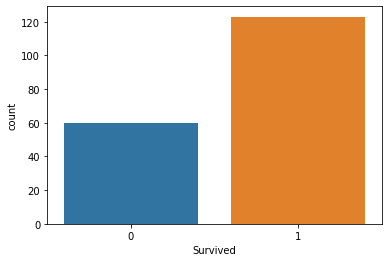

In [13]:
#Create a sns countplot of the Survived column
sns.countplot(x=df.Survived)

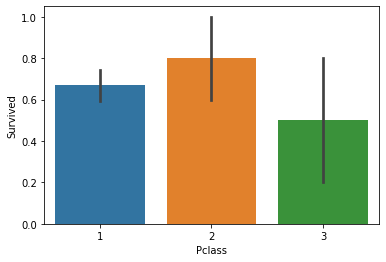

In [14]:
sns.barplot(x=df.Pclass, y=df.Survived)

In [15]:
#Describe the age column
df['Age'].describe

<bound method NDFrame.describe of 1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 183, dtype: float64>

In [16]:
df['Age'].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

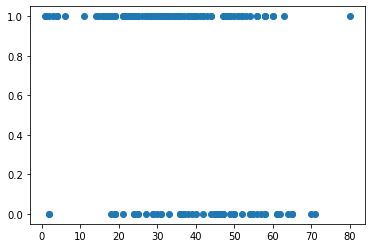

In [17]:
#Create a scatterplot for age and survived
plt.scatter(x=df.Age, y= df.Survived)

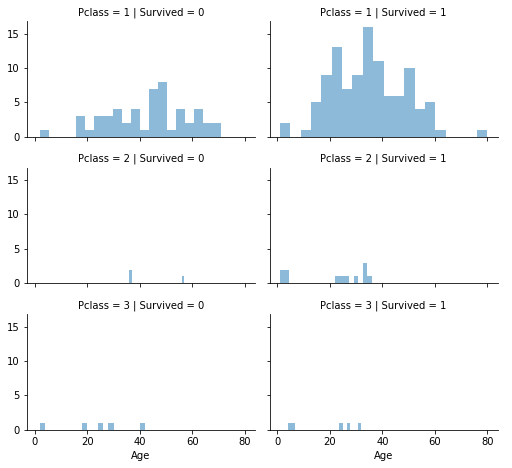

In [18]:
#Create a scatterplot for age and survived by age and by Pclass
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Feature Recode: Male = 1, Female = 2 for regression analysis

In [24]:
#split the data into X and y
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df)

ValueError: ignored

In [33]:
dict = {'male' : '1', 'female' : '2'} 
df['SexNum'] =df['Sex'].map(dict)
df['SexNum'] =  df['SexNum'].astype('int')  # change object to int

In [34]:
# Feature Selection
features = df[['Pclass','SexNum', 'Age','SibSp']]
target = df.Survived
features.corr()

,Pclass,SexNum,Age,SibSp
Pclass,1.000000,0.046181,-0.306514,-0.103592
SexNum,0.046181,1.000000,-0.184969,0.104291
Age,-0.306514,-0.184969,1.000000,-0.156162
SibSp,-0.103592,0.104291,-0.156162,1.000000


In [36]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size =0.2, random_state = 1)

In [37]:
#split the data into Survived and those who died
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'
formula


'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'

In [40]:
#Display summary of the mode
import statsmodels.api as sm #statical modeling
logitfit = sm.Logit(y_train, x_train, formula = str(formula)).fit()
logitfit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.408593
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.3497
Time:                        07:44:16   Log-Likelihood:                -59.655
converged:                       True   LL-Null:                       -91.733
Covariance Type:            nonrobust   LLR p-value:                 7.600e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.4155      0.450     -3.143      0.002      -2.298      -0.533
SexNum         3.3582      0.621      5.405      0.000       2.140       4.576
Age           -0.0511      0.012     -4.338      0.000      -0.074      -0.028
SibSp         -0.0567      0.371     -0.153      0.879      -0.784       0.671
==============================================================================
"""

In [41]:
#Round y_pred and save the values in y_pred.
#Calculate the model residuals

y_pred = np.round(logitfit.predict(x_test))
residuals = y_test - y_pred
residuals

297   -1.0
456    0.0
581    0.0
871    0.0
268    0.0
789    0.0
193    0.0
867   -1.0
730    0.0
585    0.0
97     0.0
540    0.0
625    0.0
66     0.0
390    0.0
11     0.0
473    0.0
92     0.0
177   -1.0
118   -1.0
462    0.0
558    0.0
609    0.0
453    1.0
269    0.0
781    0.0
429    1.0
307    0.0
251   -1.0
765    0.0
583   -1.0
209    1.0
245    0.0
311    0.0
102   -1.0
21     1.0
516    0.0
dtype: float64

In [42]:
print('Mean of residuals =', np.mean(residuals))

Mean of residuals = -0.08108108108108109


In [43]:
# confusion matrix 

cm = pd.crosstab(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 col_0     0.0  1.0
Survived          
0           6    7
1           4   20


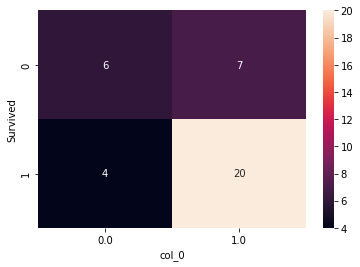



True Negative = 6
True Positive = 20
False Negative = 7
False Positive = 4


In [44]:
#Display the heatmap
sns.heatmap(cm, annot=True)
plt.show()

TN = cm[0][0]   
TP = cm[1][1]

FN = cm[1][0]
FP = cm[0][1]

print('\n\nTrue Negative =', TN)
print('True Positive =', TP)
print('False Negative =', FN)
print('False Positive =', FP)

In [45]:
Print the accuracy score using the formula accuracy_score(y_test,y_pred)
print('\n\nAccuracy =', round((TP + TN)/ (TP +TN + FN + FP),2))



Accuracy = 0.7


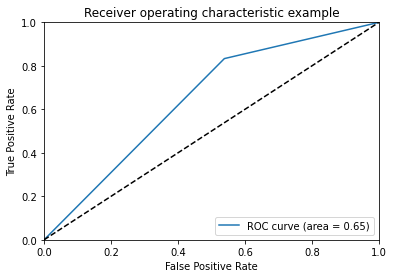

In [46]:
#Plot the ROC curve
plt.clf()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()